# 필요 Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 폰트 설정

In [2]:
plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)

# 데이터 불러오기

In [5]:
df = pd.read_csv("Data/소상공인시장진흥공단_상가(상권)정보_서울_202203.csv", sep=",")

In [6]:
df

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,23324279,제중건강원,NaN,D,소매,D10,건강/미용식품,D10A07,건강원,G47216,...,1156010600100410002034626,NaN,서울특별시 영등포구 영중로14길 11-17,150035,7250.0,NaN,1,NaN,126.907168,37.520613
1,24525909,민속악기사,NaN,D,소매,D04,취미/오락관련소매,D04A09,악기판매,G47593,...,1120012200101420011000227,NaN,서울특별시 성동구 용답5길 2,133849,4803.0,NaN,NaN,NaN,127.049018,37.566857
2,24715368,태평양진주,NaN,D,소매,D26,시계/귀금속소매,D26A01,시계/귀금속,G47830,...,1111015200100440000000001,금사랑투빌딩,서울특별시 종로구 서순라길 17-10,110390,3138.0,NaN,NaN,NaN,126.993530,37.571848
3,15554136,김선희꼼꼼국어교습소,NaN,R,학문/교육,R01,학원-보습교습입시,R01A01,학원-입시,P85501,...,1171011100101970003017195,NaN,서울특별시 송파구 위례성대로12길 31,138834,5640.0,NaN,2,NaN,127.121520,37.510967
4,17174175,비지트,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1165010100108540018009586,상랑의빌딩,서울특별시 서초구 동광로18길 82,137837,6572.0,NaN,1,NaN,126.991394,37.488375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312806,18171213,네일프렌들리,NaN,F,생활서비스,F01,이/미용/건강,F01A02,발/네일케어,S96119,...,1171010800102130000000001,문정현대지식산업센터1-1,서울특별시 송파구 법원로11길 11,138888,5836.0,1,1,NaN,127.118424,37.484759
312807,18146778,코드짐,신길점,P,스포츠,P02,실내운동시설,P02A13,헬스클럽,R91132,...,1156013200104660013000001,NaN,서울특별시 영등포구 영등포로84길 16,150853,7356.0,NaN,5,NaN,126.921695,37.511835
312808,18171760,진디자인,NaN,F,생활서비스,F12,광고/인쇄,F12A01,인쇄종합,C18119,...,1138010600102160007025289,NaN,서울특별시 은평구 연서로22길 9-16,122844,3387.0,NaN,2,NaN,126.919811,37.614986
312809,18174899,디씨엔터테인먼트,NaN,F,생활서비스,F20,행사/이벤트,F20A05,연예인대리업,M73901,...,1168010800102260001000001,NaN,서울특별시 강남구 논현로118길 28,135829,6107.0,NaN,1,NaN,127.035179,37.510257


# 결측치 확인하기 

In [8]:
df.isnull().sum()

상가업소번호            0
상호명               0
지점명          257929
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      19321
표준산업분류명       19321
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              5
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         64016
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        271963
건물관리번호            0
건물명          159727
도로명주소             0
구우편번호             0
신우편번호            32
동정보          279374
층정보          119789
호정보          312811
경도                0
위도                0
dtype: int64

# 사용할 컬럼만 정의

In [13]:
columns = ["상호명", "상권업종대분류명", "상권업종중분류명", "상권업종소분류명",
          "시도명", "시군구명", "행정동명", "법정동명", "도로명주소",
          "경도", "위도"]
df = df[columns].copy()
df

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,제중건강원,소매,건강/미용식품,건강원,서울특별시,영등포구,영등포동,영등포동5가,서울특별시 영등포구 영중로14길 11-17,126.907168,37.520613
1,민속악기사,소매,취미/오락관련소매,악기판매,서울특별시,성동구,용답동,용답동,서울특별시 성동구 용답5길 2,127.049018,37.566857
2,태평양진주,소매,시계/귀금속소매,시계/귀금속,서울특별시,종로구,종로1.2.3.4가동,봉익동,서울특별시 종로구 서순라길 17-10,126.993530,37.571848
3,김선희꼼꼼국어교습소,학문/교육,학원-보습교습입시,학원-입시,서울특별시,송파구,방이1동,방이동,서울특별시 송파구 위례성대로12길 31,127.121520,37.510967
4,비지트,음식,한식,한식/백반/한정식,서울특별시,서초구,방배4동,방배동,서울특별시 서초구 동광로18길 82,126.991394,37.488375
...,...,...,...,...,...,...,...,...,...,...,...
312806,네일프렌들리,생활서비스,이/미용/건강,발/네일케어,서울특별시,송파구,문정2동,문정동,서울특별시 송파구 법원로11길 11,127.118424,37.484759
312807,코드짐,스포츠,실내운동시설,헬스클럽,서울특별시,영등포구,신길1동,신길동,서울특별시 영등포구 영등포로84길 16,126.921695,37.511835
312808,진디자인,생활서비스,광고/인쇄,인쇄종합,서울특별시,은평구,대조동,대조동,서울특별시 은평구 연서로22길 9-16,126.919811,37.614986
312809,디씨엔터테인먼트,생활서비스,행사/이벤트,연예인대리업,서울특별시,강남구,논현2동,논현동,서울특별시 강남구 논현로118길 28,127.035179,37.510257


# 이름 정의하기 

## 이름 소문자로 만들기

In [15]:
df["상호명_소문자"] = df["상호명"].str.lower()
df

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자
0,제중건강원,소매,건강/미용식품,건강원,서울특별시,영등포구,영등포동,영등포동5가,서울특별시 영등포구 영중로14길 11-17,126.907168,37.520613,제중건강원
1,민속악기사,소매,취미/오락관련소매,악기판매,서울특별시,성동구,용답동,용답동,서울특별시 성동구 용답5길 2,127.049018,37.566857,민속악기사
2,태평양진주,소매,시계/귀금속소매,시계/귀금속,서울특별시,종로구,종로1.2.3.4가동,봉익동,서울특별시 종로구 서순라길 17-10,126.993530,37.571848,태평양진주
3,김선희꼼꼼국어교습소,학문/교육,학원-보습교습입시,학원-입시,서울특별시,송파구,방이1동,방이동,서울특별시 송파구 위례성대로12길 31,127.121520,37.510967,김선희꼼꼼국어교습소
4,비지트,음식,한식,한식/백반/한정식,서울특별시,서초구,방배4동,방배동,서울특별시 서초구 동광로18길 82,126.991394,37.488375,비지트
...,...,...,...,...,...,...,...,...,...,...,...,...
312806,네일프렌들리,생활서비스,이/미용/건강,발/네일케어,서울특별시,송파구,문정2동,문정동,서울특별시 송파구 법원로11길 11,127.118424,37.484759,네일프렌들리
312807,코드짐,스포츠,실내운동시설,헬스클럽,서울특별시,영등포구,신길1동,신길동,서울특별시 영등포구 영등포로84길 16,126.921695,37.511835,코드짐
312808,진디자인,생활서비스,광고/인쇄,인쇄종합,서울특별시,은평구,대조동,대조동,서울특별시 은평구 연서로22길 9-16,126.919811,37.614986,진디자인
312809,디씨엔터테인먼트,생활서비스,행사/이벤트,연예인대리업,서울특별시,강남구,논현2동,논현동,서울특별시 강남구 논현로118길 28,127.035179,37.510257,디씨엔터테인먼트


## 맥도날드, 버거킹 들어있는 파생변수 만들기

In [27]:
df_burger = df[df["상호명_소문자"].str.contains("(맥|멕)도날드|mcdonalds|버거킹|Burger King")]

/var/folders/6y/x7mscwfj5v1glksbx09ymx2m0000gn/T/ipykernel_27064/896769430.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_burger = df[df["상호명_소문자"].str.contains("(맥|멕)도날드|mcdonalds|버거킹|Burger King")]


In [28]:
df_burger

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자
3741,맥도날드양평SKDT점,음식,패스트푸드,패스트푸드,서울특별시,영등포구,양평2동,양평동3가,서울특별시 영등포구 선유로 195,126.893495,37.531037,맥도날드양평skdt점
3984,맥도날드명지대점,음식,패스트푸드,패스트푸드,서울특별시,서대문구,남가좌2동,남가좌동,서울특별시 서대문구 거북골로 25,126.924722,37.579927,맥도날드명지대점
4726,맥도날드,음식,패스트푸드,패스트푸드,서울특별시,서초구,방배1동,방배동,서울특별시 서초구 방배로 81,126.997104,37.481656,맥도날드
6645,버거킹,음식,패스트푸드,패스트푸드,서울특별시,강동구,성내2동,성내동,서울특별시 강동구 천호대로 1012,127.124133,37.538090,버거킹
7530,맥도날드구의역점,음식,패스트푸드,패스트푸드,서울특별시,광진구,자양2동,자양동,서울특별시 광진구 아차산로 376,127.084470,37.536429,맥도날드구의역점
...,...,...,...,...,...,...,...,...,...,...,...,...
256721,버거킹,음식,패스트푸드,패스트푸드,서울특별시,중랑구,면목본동,면목동,서울특별시 중랑구 겸재로 180,127.087935,37.588194,버거킹
258615,버거킹,음식,패스트푸드,패스트푸드,서울특별시,마포구,망원2동,망원동,서울특별시 마포구 월드컵로 155,126.904909,37.561373,버거킹
260896,버거킹,음식,패스트푸드,패스트푸드,서울특별시,성북구,동선동,동선동1가,서울특별시 성북구 동소문로 120,127.018377,37.593493,버거킹
261922,버거킹,음식,패스트푸드,패스트푸드,서울특별시,노원구,공릉2동,공릉동,서울특별시 노원구 노원로 3,127.086639,37.621982,버거킹


## 맥도날드 이름 정의하기

In [29]:
df_burger.loc[df_burger["상호명_소문자"].str.contains("(맥|멕)도날드|mcdonalds"),"브랜드명"] = "맥도날드"

/var/folders/6y/x7mscwfj5v1glksbx09ymx2m0000gn/T/ipykernel_27064/85250986.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_burger.loc[df_burger["상호명_소문자"].str.contains("(맥|멕)도날드|mcdonalds"),"브랜드명"] = "맥도날드"
/var/folders/6y/x7mscwfj5v1glksbx09ymx2m0000gn/T/ipykernel_27064/85250986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_burger.loc[df_burger["상호명_소문자"].str.contains("(맥|멕)도날드|mcdonalds"),"브랜드명"] = "맥도날드"


In [30]:
df_burger

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
3741,맥도날드양평SKDT점,음식,패스트푸드,패스트푸드,서울특별시,영등포구,양평2동,양평동3가,서울특별시 영등포구 선유로 195,126.893495,37.531037,맥도날드양평skdt점,맥도날드
3984,맥도날드명지대점,음식,패스트푸드,패스트푸드,서울특별시,서대문구,남가좌2동,남가좌동,서울특별시 서대문구 거북골로 25,126.924722,37.579927,맥도날드명지대점,맥도날드
4726,맥도날드,음식,패스트푸드,패스트푸드,서울특별시,서초구,방배1동,방배동,서울특별시 서초구 방배로 81,126.997104,37.481656,맥도날드,맥도날드
6645,버거킹,음식,패스트푸드,패스트푸드,서울특별시,강동구,성내2동,성내동,서울특별시 강동구 천호대로 1012,127.124133,37.538090,버거킹,NaN
7530,맥도날드구의역점,음식,패스트푸드,패스트푸드,서울특별시,광진구,자양2동,자양동,서울특별시 광진구 아차산로 376,127.084470,37.536429,맥도날드구의역점,맥도날드
...,...,...,...,...,...,...,...,...,...,...,...,...,...
256721,버거킹,음식,패스트푸드,패스트푸드,서울특별시,중랑구,면목본동,면목동,서울특별시 중랑구 겸재로 180,127.087935,37.588194,버거킹,NaN
258615,버거킹,음식,패스트푸드,패스트푸드,서울특별시,마포구,망원2동,망원동,서울특별시 마포구 월드컵로 155,126.904909,37.561373,버거킹,NaN
260896,버거킹,음식,패스트푸드,패스트푸드,서울특별시,성북구,동선동,동선동1가,서울특별시 성북구 동소문로 120,127.018377,37.593493,버거킹,NaN
261922,버거킹,음식,패스트푸드,패스트푸드,서울특별시,노원구,공릉2동,공릉동,서울특별시 노원구 노원로 3,127.086639,37.621982,버거킹,NaN


In [31]:
df_burger["브랜드명"] = df_burger["브랜드명"].fillna("버거킹")

/var/folders/6y/x7mscwfj5v1glksbx09ymx2m0000gn/T/ipykernel_27064/3710007330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_burger["브랜드명"] = df_burger["브랜드명"].fillna("버거킹")


In [32]:
df_burger

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
3741,맥도날드양평SKDT점,음식,패스트푸드,패스트푸드,서울특별시,영등포구,양평2동,양평동3가,서울특별시 영등포구 선유로 195,126.893495,37.531037,맥도날드양평skdt점,맥도날드
3984,맥도날드명지대점,음식,패스트푸드,패스트푸드,서울특별시,서대문구,남가좌2동,남가좌동,서울특별시 서대문구 거북골로 25,126.924722,37.579927,맥도날드명지대점,맥도날드
4726,맥도날드,음식,패스트푸드,패스트푸드,서울특별시,서초구,방배1동,방배동,서울특별시 서초구 방배로 81,126.997104,37.481656,맥도날드,맥도날드
6645,버거킹,음식,패스트푸드,패스트푸드,서울특별시,강동구,성내2동,성내동,서울특별시 강동구 천호대로 1012,127.124133,37.538090,버거킹,버거킹
7530,맥도날드구의역점,음식,패스트푸드,패스트푸드,서울특별시,광진구,자양2동,자양동,서울특별시 광진구 아차산로 376,127.084470,37.536429,맥도날드구의역점,맥도날드
...,...,...,...,...,...,...,...,...,...,...,...,...,...
256721,버거킹,음식,패스트푸드,패스트푸드,서울특별시,중랑구,면목본동,면목동,서울특별시 중랑구 겸재로 180,127.087935,37.588194,버거킹,버거킹
258615,버거킹,음식,패스트푸드,패스트푸드,서울특별시,마포구,망원2동,망원동,서울특별시 마포구 월드컵로 155,126.904909,37.561373,버거킹,버거킹
260896,버거킹,음식,패스트푸드,패스트푸드,서울특별시,성북구,동선동,동선동1가,서울특별시 성북구 동소문로 120,127.018377,37.593493,버거킹,버거킹
261922,버거킹,음식,패스트푸드,패스트푸드,서울특별시,노원구,공릉2동,공릉동,서울특별시 노원구 노원로 3,127.086639,37.621982,버거킹,버거킹


In [33]:
df_burger["브랜드명"].value_counts()

버거킹     116
맥도날드    100
Name: 브랜드명, dtype: int64

## 상권업종대분류명 != 음식 제외하기 

In [ ]:
df_burger["상권업종대분류명"].value_counts()

In [37]:
df_burger[df_burger["상권업종대분류명"] != "음식"]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
130368,버거킹,생활서비스,기타서비스업,상품권판매,서울특별시,종로구,종로5.6가동,연지동,서울특별시 종로구 종로33길 15,127.000979,37.571803,버거킹,버거킹


In [38]:
df_burger = df_burger[df_burger["상권업종대분류명"] == "음식"].copy()

In [40]:
df_burger["상권업종대분류명"].value_counts()

음식    215
Name: 상권업종대분류명, dtype: int64

# 지도에 나타내기

In [44]:
import folium

In [45]:
lat = df_burger["위도"].mean()

In [46]:
long = df_burger["경도"].mean()

In [47]:
m = folium.Map([lat,long])

In [51]:
for i in df_burger.index:
    sub_lat = df_burger.loc[i, "위도"]
    sub_long = df_burger.loc[i, "경도"]
    sub_title = df_burger.loc[i, "상호명"] + "-" + df_burger.loc[i, "도로명주소"]
    
    color="yellow"
    if df_burger.loc[i, "브랜드명"] == "버거킹":
        color="orange"
        
    folium.Marker([sub_lat,sub_long],
                 icon=folium.Icon(color=color),
                  toolip=sub_title).add_to(m)
    
m

/var/folders/6y/x7mscwfj5v1glksbx09ymx2m0000gn/T/ipykernel_27064/3248287764.py:11: UserWarning: color argument of Icon should be one of: {'red', 'lightgray', 'green', 'darkgreen', 'darkred', 'beige', 'lightred', 'lightgreen', 'lightblue', 'black', 'darkblue', 'cadetblue', 'blue', 'white', 'purple', 'darkpurple', 'gray', 'pink', 'orange'}.
  icon=folium.Icon(color=color),


# 수치와 그래프로 비교하기

## 수치

In [52]:
df_burger["브랜드명"].value_counts()

버거킹     115
맥도날드    100
Name: 브랜드명, dtype: int64

## 그래프(countplot)

<AxesSubplot:xlabel='브랜드명', ylabel='count'>

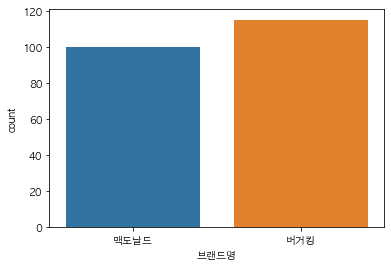

In [53]:
sns.countplot(data=df_burger, x="브랜드명")

## 시군구별로 브랜드 빈도수 차이 비교하기

<AxesSubplot:xlabel='시군구명', ylabel='count'>

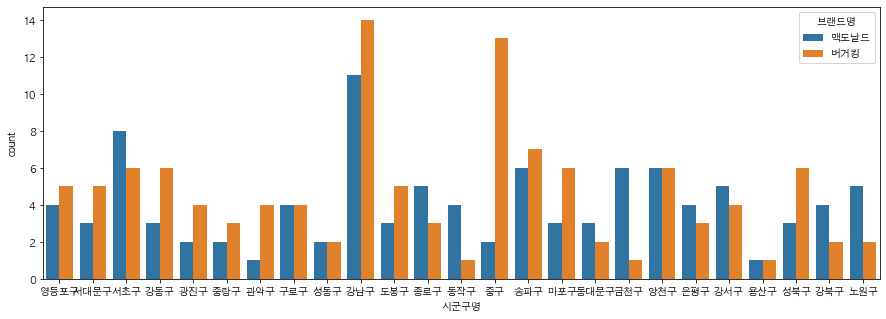

In [55]:
plt.figure(figsize=(15,5))
sns.countplot(data=df_burger, x="시군구명", hue="브랜드명")

## scatterplot으로 위경도 표현하기

<AxesSubplot:xlabel='경도', ylabel='위도'>

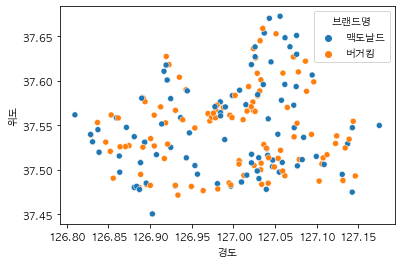

In [56]:
sns.scatterplot(data=df_burger, x="경도", y="위도", hue="브랜드명")